# TP 7: Optimisation sans contraintes

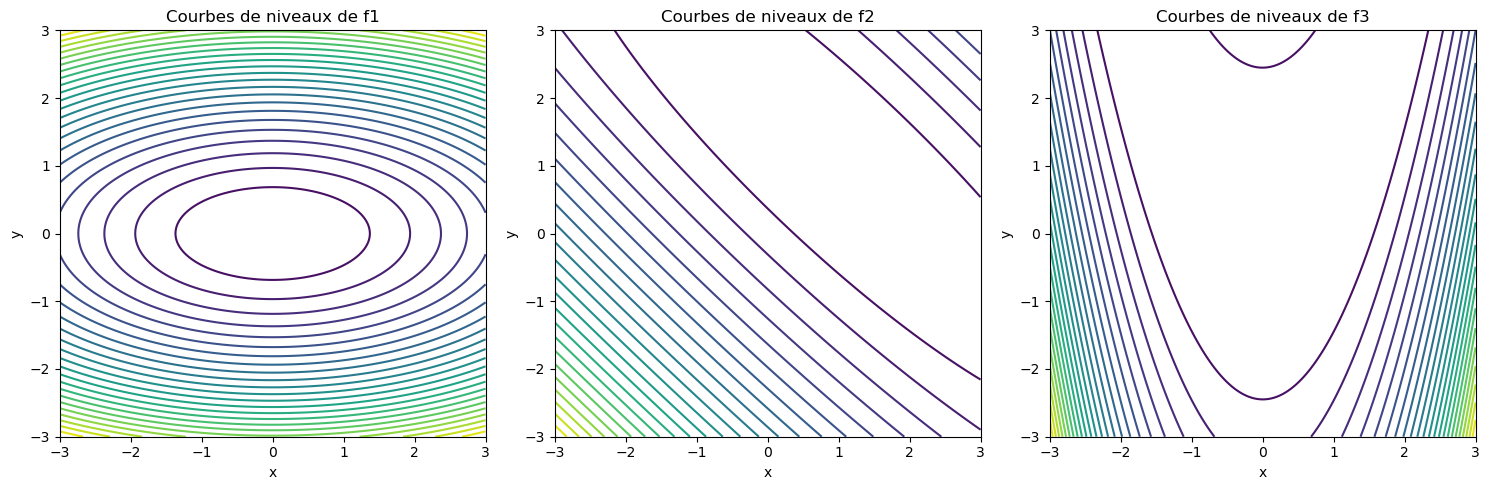

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x, a):
    return np.power(x[0], 2) + np.multiply(a, np.power(x[1], 2))

def f2(x, a):
    return np.multiply(2 * a, np.power(x[0] + x[1] - 2, 2)) + np.power(x[0] - x[1], 2)

def f3(x, a, b):
    return np.multiply(b, np.power(x[1] - np.power(x[0], 2), 2)) + np.power(x[0] - a, 2)

xlim, ylim = [-3, 3], [-3, 3]
N_x, N_y = 200, 200
N_isoline = 25

X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], N_x),
                   np.linspace(ylim[0], ylim[1], N_y))


Z1 = f1([X, Y], 4)  
Z2 = f2([X, Y], 10) 
Z3 = f3([X, Y], 1, 100) 


fig, axs = plt.subplots(1, 3, figsize=(15, 5))


for i, Z, title in zip(range(3), [Z1, Z2, Z3], ['f1', 'f2', 'f3']):
    ax = axs[i]
    levels = np.linspace(np.min(Z), np.max(Z), N_isoline)
    ax.contour(X, Y, Z, levels=levels)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f"Courbes de niveaux de {title}")

plt.tight_layout()
plt.show()


### Exercice 2

In [8]:
def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  
    n_iter = 0
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  
        x_new = x + step * w  
        if np.linalg.norm(x_new - x) < tol:  
            break
        x = x_new
    return x, n_iter

f = lambda x: np.add(np.power(x[0], 2), np.power(x[1], 2))
df = lambda x: np.array([np.multiply(2, x[0]), np.multiply(2, x[1])])

x0 = np.array([1, 1])

solution, iterations = gradient_descent(f, df, x0)

print("Solution trouvée:", solution)
print("Nombre d'itérations:", iterations)


def f1(x):
    return np.divide(np.power(x[0], 2), (1 + np.multiply(4, np.power(x[1], 2)))) + np.multiply(4, np.power(x[1], 2))

def df1(x):
    return np.array([np.divide(np.multiply(2, x[0]), (1 + np.multiply(4, np.power(x[1], 2)))),
                     np.divide(np.multiply(8, x[1]), (1 + np.multiply(4, np.power(x[1], 2))))])

def f2(x):
    return np.multiply(2, np.multiply(10, np.power((x[0] + x[1] - 2), 2))) + np.power((x[0] - x[1]), 2)

def df2(x):
    return np.array([np.multiply(2, np.multiply(10, np.add(np.add(np.multiply(2, x[0]), np.multiply(2, x[1])), -4))) + np.multiply(2, (x[0] - x[1])),
                     np.multiply(2, np.multiply(10, np.add(np.add(np.multiply(2, x[0]), np.multiply(2, x[1])), -4))) - np.multiply(2, (x[0] - x[1]))])

def f3(x):
    return np.multiply(100, np.power((x[1] - np.power(x[0], 2)), 2)) + np.power((1 - x[0]), 2)

def df3(x):
    return np.array([np.subtract(np.multiply(-400, np.multiply(x[0], np.subtract(x[1], np.power(x[0], 2)))), np.multiply(2, np.subtract(1, x[0]))),
                     np.multiply(200, np.subtract(x[1], np.power(x[0], 2)))])


def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  
    n_iter = 0
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  
        x_new = x + step * w  
        if np.linalg.norm(x_new - x) < tol:  
            break
        x = x_new
    return x, n_iter

x0_f1 = np.array([1, 4])
x0_f2 = np.array([-4, 0])
x0_f3 = np.array([3, 4])

steps = [0.001, 0.01, 0.1, 0.5, 1]

for step in steps:
    print(f"Step: {step}")
    for func_name, func, grad_func, x0 in [("f1", f1, df1, x0_f1), ("f2", f2, df2, x0_f2), ("f3", f3, df3, x0_f3)]:
        solution, iterations = gradient_descent(func, grad_func, x0, step=step)
        print(f"Function: {func_name}, Solution: {solution}, Iterations: {iterations}")
    print()


def gradient_descent(f, df, x0, step=1, n_iter_max=1000, tol=1e-7):
    x = x0  
    n_iter = 0
    x_history = [x]  
    while n_iter < n_iter_max:
        n_iter += 1
        w = -df(x)  
        x_new = x + step * w  
        if np.linalg.norm(x_new - x) < tol:  
            break
        x = x_new
        x_history.append(x)  
    return x, n_iter, np.array(x_history)

Solution trouvée: [1 1]
Nombre d'itérations: 1000
Step: 0.001
Function: f1, Solution: [0.96538929 3.47429464], Iterations: 1000
Function: f2, Solution: [0.96366138 1.03633862], Iterations: 1000
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.01
Function: f1, Solution: [5.58608868e-06 8.94073975e-22], Iterations: 1000
Function: f2, Solution: [0.99999827 1.00000173], Iterations: 343
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.1
Function: f1, Solution: [4.32322224e-07 4.18568414e-45], Iterations: 108
Function: f2, Solution: [nan nan], Iterations: 1000
Function: f3, Solution: [nan nan], Iterations: 1000

Step: 0.5
Function: f1, Solution: [ 8.02630684e-300 -4.92108030e-001], Iterations: 1000
Function: f2, Solution: [nan nan], Iterations: 1000


/tmp/ipykernel_50345/3942392969.py:42: RuntimeWarning: overflow encountered in power
  return np.array([np.subtract(np.multiply(-400, np.multiply(x[0], np.subtract(x[1], np.power(x[0], 2)))), np.multiply(2, np.subtract(1, x[0]))),
/tmp/ipykernel_50345/3942392969.py:43: RuntimeWarning: overflow encountered in power
  np.multiply(200, np.subtract(x[1], np.power(x[0], 2)))])
/tmp/ipykernel_50345/3942392969.py:42: RuntimeWarning: invalid value encountered in subtract
  return np.array([np.subtract(np.multiply(-400, np.multiply(x[0], np.subtract(x[1], np.power(x[0], 2)))), np.multiply(2, np.subtract(1, x[0]))),
/tmp/ipykernel_50345/3942392969.py:43: RuntimeWarning: invalid value encountered in subtract
  np.multiply(200, np.subtract(x[1], np.power(x[0], 2)))])
/tmp/ipykernel_50345/3942392969.py:35: RuntimeWarning: overflow encountered in multiply
  return np.array([np.multiply(2, np.multiply(10, np.add(np.add(np.multiply(2, x[0]), np.multiply(2, x[1])), -4))) + np.multiply(2, (x[0] - x[1]))

Function: f3, Solution: [nan nan], Iterations: 1000

Step: 1
Function: f1, Solution: [-3.91480052e-301 -3.63424628e-001], Iterations: 1000
Function: f2, Solution: [-5016033337352024260  1350453376105511872], Iterations: 1000
Function: f3, Solution: [-6740118345842173693  3427809111875910212], Iterations: 1000



### Exercice 3

In [4]:
import numpy as np
from scipy.linalg import solve

def newton(g, dg, x0, n_iter_max=100, tol=1e-7):
    x = x0
    res = np.linalg.norm(g(x))
    n_iter = 0
    while (n_iter < n_iter_max) and (res > tol):
        n_iter += 1
        x = x - solve(dg(x), g(x)) 
        res = np.linalg.norm(g(x))
    return x, n_iter, res


x0_f1 = np.array([1, 4])
x0_f2 = np.array([-4, 0])
x0_f3 = np.array([3, 4])
